<a href="https://colab.research.google.com/github/katherymbr/TP1_Fractales/blob/main/TP1_Fractales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

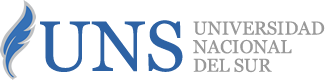

In [890]:
%%html
<marquee style='width: 30%; color: blue;'><b>Practico 1!</b></marquee>

MODELOS FRACTALES Y SISTEMAS CAÓTICOS
---
PRACTICO No. 1.




---


**Box counting para imágenes binarias**
---


```
Estudiante: Katherym Bambague Ruíz
```



Implementar box counting para imágenes binarias:

1.  Ubicar la imagen binaria en un viewport
2.  Subdividir el viewport en cajas de tamaño 1, ½, ¼ etc. del viewport (hasta llegar al tamaño del pixel).
3. Contar la cantidad de cajas tocadas por el conjunto (promediando traslaciones)
4. Computar D como la pendiente de la recta de ajuste en el espacio log-log.

# Importo librerias

In [891]:
# IMPORTO LAS LIBRERIAS

import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio 
from scipy import fftpack
from tabulate import tabulate


# Funciones

In [892]:
# FUNCIÓN PARA LEER LAS IMÁGENES

def leer_imagen(rute):
     imagen= imageio.imread(rute)
     return (imagen)

ruta= '/content/drive/MyDrive/'

In [893]:
#función box counting

def box_counting(im, Dx=0, Dy=0, figure=True):

    # Definición del area del viewport
    viewport_y, viewport_x = im_binary1.shape
    beta = 1.5 #Factor de incremento del viewport con respecto a las dimensiones de la imagen 
    viewport_y = int(viewport_y*beta)
    viewport_x = int(viewport_x*beta)
    viewport = np.zeros((viewport_y,viewport_x))
    # se indexa la imagen en el viewport según el corrimiento en X - Y deseado
    viewport[Dy:im_binary1.shape[0]+Dy, Dx:im_binary1.shape[1]+Dx] = im_binary1  # Dy alto de la imagen, Dx=1 largo

    # Obtengo la dimensión mínima de la imagen en x o y.
    min_axes = min(viewport.shape) # para hallar cual es el eje menor eje del viewport, si el ancho o el largo (entre x o y)
    #print("eje menor, del viewport=", min_axes)
    # Obtener la mayor potencia de 2 que sea menor al valor de min_axes 
    nbase = 2**np.floor(np.log(min_axes)/np.log(2)) # np.floor toma la parte entera del reciproco entre logaritmos sin aproximarlo
    # Se obtiene el exponente
    n = int(np.log(nbase)/np.log(2))
    # Se obtienen los boxes (media) en base 2^n  hasta 2^1
    boxes = 2**np.arange(1, n+1)[::-1]
    #print(boxes)
    
    # considerando el tamaño de los boxes se cuentan los pixeles que hay en cada box, para cada partición 2^n
    counts = []
    for box in boxes:
        bc = np.add.reduceat(
            np.add.reduceat(viewport, np.arange(0, viewport_y, box), axis=0),
                                np.arange(0, viewport_x, box), axis=1)
        #Se cuentan el número de box cuya suma de pixels sea mayor a 0 y menor box^2   
        counts.append(len(np.where((bc > 0) & (bc < box**2))[0]))


    a = np.log(1/boxes) 
    b = np.log(counts)
    # se obtiene la pendiente D que determina el box counting
    D = np.polyfit(a, b, 1)
    # se genera la recta de ajuste a partir de D
    fit = np.polyval(D, a)


    if figure:
        fig, bx = plt.subplots(figsize = (8,6))
        bx.imshow(viewport, cmap='gray')
        bx.set_title('Dx='+ str(Dx) + '  Dy=' +str(Dy))

        fig, ax = plt.subplots(figsize = (7,5))
        ax.scatter(a, b, c = "orange")
        ax.set_ylabel("$\log (mean)$")
        ax.set_xlabel("$\log (1/ box)$")
        ax.plot(a,fit, '--',label = f"Fit Linear: {np.round(D[0],4)}X+{np.round(D[1],3)}")
        ax.legend()
        viewport_tamaño= viewport.shape
        print("tamaño del viewport=", viewport_tamaño)
        #print("Eje menor, del viewport=", min_axes)
        tamaño= im_binary1.shape
        print("Tamaño de la imagen Binarizada=", tamaño)
        print("Dimensión de Box obtenida=",{np.round(D[0],4)})
        
        
    return np.round(D[0],4)
  

In [894]:
# FUNCIÓN PARA DESCOMPONER LA IMAGEN EN SUS CANALES R,G,B

def image_to_rgb(imagen):
  r = imagen[:,:,0]/255.0
  g = imagen[:,:,1]/255.0
  b = imagen[:,:,2]/255.0
  return r, g, b

In [895]:
# FUNCIÓN PARA PASAR DE RGB A YIQ

def rgb_yiq (r1,g1,b1):

  y= 0.299*r1  +0.587*g1   +0.11*b1 
  i= 0.596*r1  -0.274*g1   -0.322*b1
  q= 0.211*r1  -0.523*g1   +0.312*b1
  return(y,i,q)

In [896]:
# FUNCIÓN PARA GRAFICAR 3 IMAGENES EN FORMA HORONTAL CON TÍTULO

def graficar_tresimagenes_horizontal(imagen_oscura, imagen_brillante, imagen_oscurapadding):
  fig, ax = plt.subplots(1, 3, dpi=400)
  ax[0].imshow(imagen_oscura, cmap='gray')  # DEBE SER LA IMAGEN DELA PADING, NO LA IMAGEN
  ax[0].set_axis_off()
  ax[0].set_title('Imagen 1', fontsize=3)
  #print('imagen_1, imagen_2 , imagen_3')
  ax[1].imshow(imagen_brillante, cmap='gray')
  ax[1].set_axis_off()
  ax[1].set_title('Imagen 2',fontsize=3)
  ax[2].imshow(imagen_oscurapadding, cmap='gray')
  ax[2].set_axis_off()
  ax[2].set_title('Imagen 3', fontsize=3)
  plt.show()

# Leo la imagen

tamaño de la imagen en RGB (564, 564, 3)



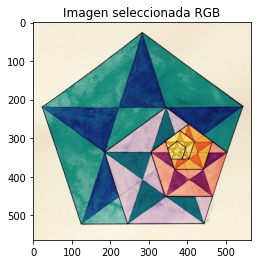

In [897]:
# Leo imagen

imagen1= leer_imagen(ruta+'fractal3.jpg')
plt.imshow(imagen1)
print('tamaño de la imagen en RGB', imagen1.shape)
plt.title('Imagen seleccionada RGB') # Titulo de la imagen
print("")

# Ejecuto función: "Convertir Imagen de RGB a YIQ"

In [898]:
# Descompongo la imagen en RGB

r1,g1,b1= image_to_rgb(imagen1)

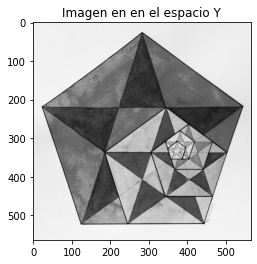

In [899]:
# paso la imagen de RGB al espacio YIQTomando para la binarización Y.

y1,i1,q1= rgb_yiq (r1,g1,b1)
plt.imshow( y1, cmap='gray')
plt.axis('on')
plt.title('Imagen en en el espacio Y')
plt.show()

# Binarizar la imagen

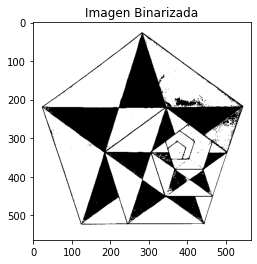

tamaño de la imagen binarizada: (564, 564)


In [900]:
# Binarización de la imagen (espacio Y) mediante un Umbral

#@title Binarización de imagen mediante un umbral. { run: "auto" }

threshold = 0.35 #@param {type:"slider", min:0, max:1, step:0.01}
im_binary1 = np.copy(y1)

mask_1 = im_binary1 >= threshold
mask_2 = im_binary1 < threshold

im_binary1[mask_1] = 1 #pixeles mayores, iguakes a threshold van a tomar el valor de 1
im_binary1[mask_2] = 0 #pixeles menores a threshold van a tomar el valor de 0

im_binary1.astype(np.uint8)
plt.imshow(im_binary1*255, cmap='gray')
plt.axis('on')
plt.title('Imagen Binarizada')
plt.show()
tamaño= im_binary1.shape
print("tamaño de la imagen binarizada:", tamaño)

# Ejecuto Box Counting

tamaño del viewport= (846, 846)
Tamaño de la imagen Binarizada= (564, 564)
Dimensión de Box obtenida= {1.3068}
Conteo a 0 dxy: 1.2824
Conteo a 20 dxy: 1.2778
Conteo a 35 dxy: 1.3299
Conteo a 44 dxy: 1.2759
Conteo a 70 dxy: 1.309
Conteo a 90 dxy: 1.2857


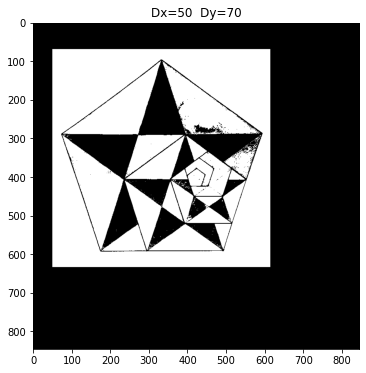

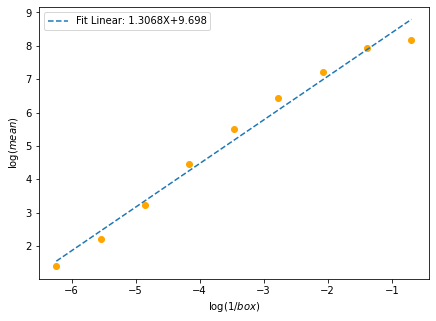

In [901]:
# Implementacion del Box Counting

conteo = box_counting(im_binary1, Dx=50, Dy=70 , figure=True) #ingreso la imagen binarizada y el desplazamiento 
#print('Box counting: '+ str(conteo))
# %%
dxy =[0, 20, 35, 44, 70, 90]
conteo=[]
for a in dxy:
    cont = box_counting(im='C:/Users/KATHERYM/OneDrive/Escritorio/atardecer.jpg', Dx=a, Dy=a, figure=False)
    conteo.append(cont)
    print('Conteo a '+str(a) +' dxy: '+ str(cont))
conteo_prom = np.round(np.sum(conteo)/len(conteo),4)
